In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
N = 1000

In [57]:
ip = np.random.randn(N) > 0.5 
ip = np.array(ip) 

In [58]:
s = 2 * ip - 1        

s = np.array(s) 


In [59]:
eb_no_db = np.arange(5,30) 

In [60]:
bit_error_rate_zero = np.zeros(len(eb_no_db)) 
bit_error_rate_MMSE = np.zeros(len(eb_no_db))
bit_error_rate_zero_DFE = np.zeros(len(eb_no_db))

In [61]:
def Zero_Forcing(): 

    for jj in range(len(eb_no_db)):  

        nErr = 0 
        
        received_bits_list = [] 

        for ii in range(N//2): 
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            h12 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h22 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            x1 = s[2 * ii] 
            
            x2 = s[2 * ii + 1] 
            

            H = np.array([[h11, h12], [h21, h22]]) 
            
            n = np.array([[n1], [n2]]) 
            
            x = np.array([[x1], [x2]])  

            Hx = np.matmul(H, x)    
            
            
            y = (1 / np.sqrt(2)) * Hx + n * (10 ** (eb_no_db[jj] / 20)) 
            
           
            # Forming the Zero Forcing equalization matrix W = inv(H^H*H)*H^H
           
            
            H_conjugate = np.conjugate(H) 
            
            H_Hermitian = np.transpose(H_conjugate)
    
            H_Hermitian_H = np.matmul(H_Hermitian,H) 
            
            rank = np.linalg.matrix_rank(H_Hermitian_H)
            
            invertible = True if np.all(np.isfinite(np.linalg.inv(H_Hermitian_H))) else False

            H_inverse = np.linalg.inv(H_Hermitian_H) 
            
            W = np.matmul(H_inverse, H_Hermitian)
            
            x_hat = np.matmul(W, y)
            
            received_bits = np.real(x_hat > 0)
            
#             received_bits_list.extend(received_bits.ravel())
 
            m = received_bits[0,0] 
                                   
            n = received_bits[1,0]
            received_bits_list.append(m) 
            received_bits_list.append(n)
        
        nErr = np.sum(ip != received_bits_list) 
        
        bit_error_rate_zero[jj] = nErr / N 
        
        
        
        

    return  bit_error_rate_zero



#     cnt=0
#     for x in range(0,len(result),2):        
#             if result[x] == ip[x] and result[x+1] == ip[x+1]:
#                 continue
#             cnt+=1
            
#     print("total error:",cnt)
    
    

In [62]:
def MMSE(): 

    for jj in range(len(eb_no_db)):  

        nErr = 0 
        
        received_bits_list = [] 

        for ii in range(N//2): 
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            h12 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h22 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            x1 = s[2 * ii] 
            
            x2 = s[2 * ii + 1] 
            

            H = np.array([[h11, h12], [h21, h22]]) 
            
            n = np.array([[n1], [n2]]) 
            
            x = np.array([[x1], [x2]])  

            Hx = np.matmul(H, x)    
            
            
            y = (1 / np.sqrt(2)) * Hx + n * (10 ** (-eb_no_db[jj] / 20)) 
            
           
            # Forming the MMSE equalization matrix W = inv(H^H*H+(1/snr)I)*H^H
           
            
            H_conjugate = np.conjugate(H) 
            
            H_Hermitian = np.transpose(H_conjugate)
    
            H_Hermitian_H = np.matmul(H_Hermitian,H)
            
            identity_matrix = np.eye(2)
            
            snr_inverse = (1 / (10 ** (eb_no_db[jj] / 10)))
            
            H_Hermitian_H = H_Hermitian_H + snr_inverse * identity_matrix
                               

            H_inverse = np.linalg.inv(H_Hermitian_H) 
            
            W = np.matmul(H_inverse, H_Hermitian)
            
            x_hat = np.matmul(W, y)
            
            received_bits = np.real(x_hat > 0)
            
#             received_bits_list.extend(received_bits.ravel())
 
            m = received_bits[0,0] 
                                   
            n = received_bits[1,0]
            
            received_bits_list.append(m) 
            received_bits_list.append(n)
        
        nErr = np.sum(ip != received_bits_list) 
        
        bit_error_rate_MMSE[jj] = nErr / N 
        
        
        
        

    return bit_error_rate_MMSE

In [63]:
def Zero_Forcing_SIC():

    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        received_bits_list = []
        
        
        
        for ii in range(N//2):
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h12 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h22 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            x1 = s[2 * ii]
            
            x2 = s[2 * ii + 1]
            
            H = np.array([[h11, h12], [h21, h22]])
            
            n = np.array([[n1], [n2]])
            
            x = np.array([[x1], [x2]])
            
            Hx = np.matmul(H, x)
            
            y = (1 / np.sqrt(2)) * Hx + n * (10 ** (-eb_no_db[jj] / 20))
            
            H_conjugate = np.conjugate(H)
            
            H_Hermitian = np.transpose(H_conjugate)
            
            H_Hermitian_H = np.matmul(H_Hermitian, H)
            
            rank = np.linalg.matrix_rank(H_Hermitian_H)
            
            invertible = True if np.all(np.isfinite(np.linalg.inv(H_Hermitian_H))) else False
            
            H_inverse = np.linalg.inv(H_Hermitian_H)
            
            W = np.matmul(H_inverse, H_Hermitian)
            
            x_hat = np.matmul(W, y)
            
            # upto zero forcing algorithm
            
            
            Px1 = np.abs(h11)**2 + np.abs(h21)**2
            
            Px2 = np.abs(h12)**2 + np.abs(h22)**2
            
            
            if Px1 > Px2:
                
                h1 = np.array([[h11],[h21]]) #x1 travel channel
                
                h2 = np.array([[h12],[h22]]) # remaining channel after substract
                
                x1_hat = x_hat[0,0] #after zero forcing x1 bit 
                
                hx = np.dot(h1,x1_hat)
                
                r = y - hx # substracting x1 bit with channel
                
                #finding remaining channel pseudo_inverse
                
                h2_conjugate = np.conjugate(h2)
            
                h2_Hermitian = np.transpose(h2_conjugate)
            
                h2_Hermitian_h2 = np.matmul(h2_Hermitian, h2)
            
                h2_inverse = np.linalg.inv(h2_Hermitian_h2)
            
                equalize_value = np.matmul(h2_inverse, h2_Hermitian)
                
                x2_hat = np.matmul(equalize_value,r)
                
                received_bits = np.real(x2_hat > 0)
                
                
                m = x1_hat > 0 
                
                n = received_bits[0, 0]   
                
                received_bits_list.append(m)
                
                received_bits_list.append(n)
                
            elif Px1 < Px2 :
                
                h2 = np.array([[h12],[h22]])
                
                h1 = np.array([[h11],[h21]])
                
                x2_hat = x_hat[1,0]
                
                hx = np.dot(h2,x2_hat)
                
                r = y - hx
                
                h1_conjugate = np.conjugate(h1)
            
                h1_Hermitian = np.transpose(h1_conjugate)
            
                h1_Hermitian_h1 = np.matmul(h1_Hermitian, h1)
            
                h1_inverse = np.linalg.inv(h1_Hermitian_h1)
            
                equalize_value = np.matmul(h1_inverse, h1_Hermitian)
                
                x1_hat = np.matmul(equalize_value,r)
                
                received_bits = np.real(x1_hat > 0)
                
                m = received_bits[0, 0]
                
                n = x2_hat > 0
                
                received_bits_list.append(m)
                
                received_bits_list.append(n)
            
        nErr = np.sum(ip != received_bits_list)
#         print("received_bits_list",len(received_bits_list))
#         print("ip",len(ip))
        bit_error_rate_zero_DFE[jj] = nErr / N

    
    return bit_error_rate_zero_DFE


[0.393 0.401 0.436 0.456 0.462 0.498 0.494 0.506 0.498 0.506 0.536 0.509
 0.52  0.546 0.53  0.548 0.548 0.552 0.56  0.551 0.559 0.57  0.546 0.556
 0.587]
[0.107 0.079 0.062 0.078 0.066 0.048 0.03  0.017 0.023 0.012 0.01  0.008
 0.007 0.003 0.011 0.002 0.003 0.003 0.002 0.    0.001 0.001 0.002 0.
 0.   ]
[0.13  0.12  0.1   0.09  0.054 0.046 0.031 0.032 0.021 0.023 0.011 0.014
 0.008 0.009 0.005 0.01  0.    0.002 0.001 0.003 0.    0.    0.    0.
 0.001]


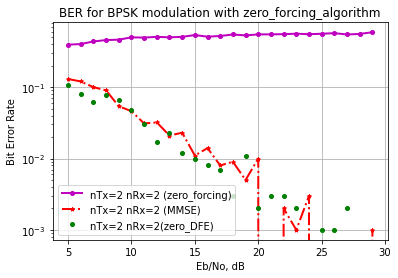

In [64]:
result_zero = Zero_Forcing()
result_MMSE = MMSE()
resutl_zero_DFE = Zero_Forcing_SIC()
print(result_zero)
print(resutl_zero_DFE)
print(result_MMSE)

plt.figure()
plt.semilogy(eb_no_db, result_zero, 'mo-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (zero_forcing)')
plt.semilogy(eb_no_db, result_MMSE, 'r*-.', linewidth=2, markersize=4, label='nTx=2 nRx=2 (MMSE)')
plt.semilogy(eb_no_db,resutl_zero_DFE,'go',linewidth=2, markersize=4,label='nTx=2 nRx=2(zero_DFE)')
# plt.axis([0, 30, 1e-5, 0.1])
plt.grid(True)
plt.legend()
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for BPSK modulation with zero_forcing_algorithm')
plt.show()